# ALGORITMO PARA PREDIÇÃO DE MANUTENÇÃO PREDITIVA

O objetivo desse algoritmo é predizer quando será necessário a realização de Manutenção, para isso, uma rede neural do tipo Perceptron Multicamdas analisará as medições de centenas de sensores e informara quando a manutenção é recomendada.

In [3]:
# Carregar Bibliotecas Principais
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [4]:
# Carregar tabela com os valores de medições dos sensores.
sensores  = pd.read_csv('uci-secom.csv')
sensores.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


# LIMPEZA DE DADOS

Nessa fase realiza-se uma análise dos dados para excluir dados não confiáveis e/ou ruídos.

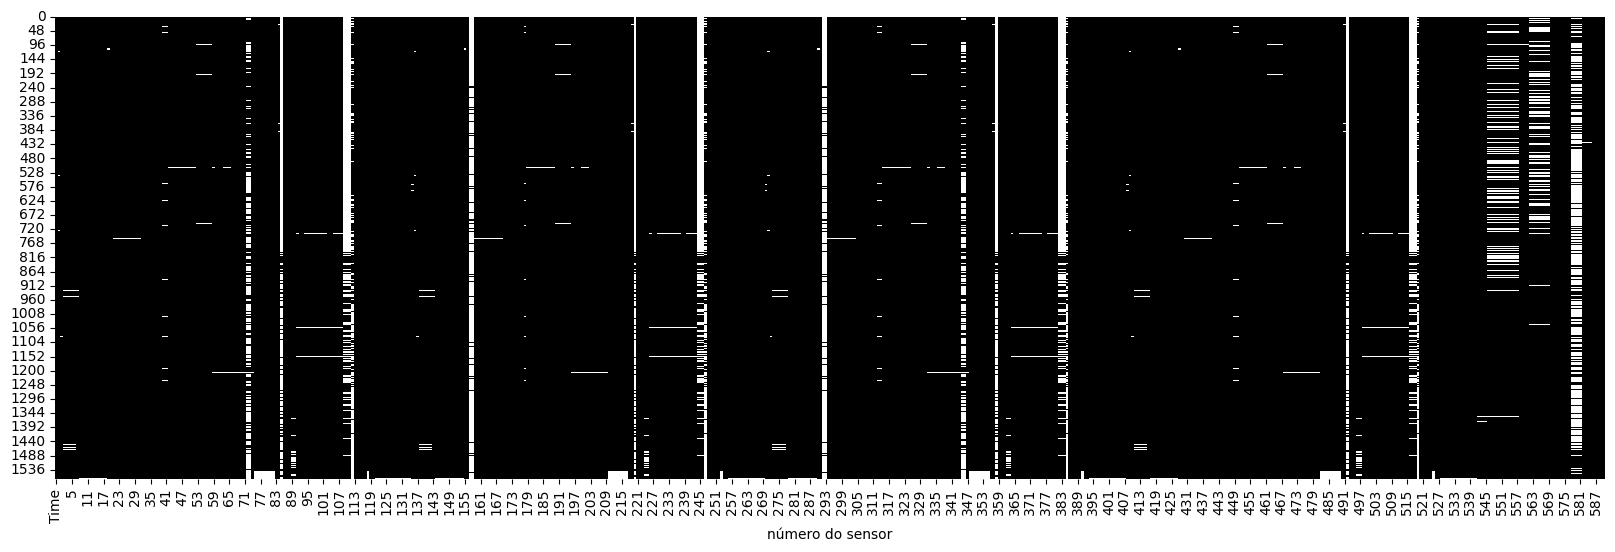

In [5]:
# mapa de calor binário em que o preto representa célular com valor e o branco célula vazia.
plt.figure(figsize=(20, 6))
sns.heatmap(sensores.isnull(), cmap='gray', cbar=False)
plt.xlabel('número do sensor')
plt.autoscale(tight=True, axis='x')
plt.savefig('figtest.png')

In [6]:
# Excluir as colunas com mais de 50% de valores faltantes.
nulos = sensores.isnull().sum() # conta a quantidade de valores nulos por sensor
dimensao = np.shape(sensores)
dimensao_x = dimensao[1]

In [7]:
for i in range(len(nulos)):
    if nulos[i] > (dimensao_x/2):
        a = str(i)
        sensores.drop(a, axis=1, inplace=True)

In [8]:
nova_dimensao = np.shape(sensores)
nova_dimensao_x = nova_dimensao[1]

In [9]:
r = dimensao_x - nova_dimensao_x # nº de sensores deletados
r

32

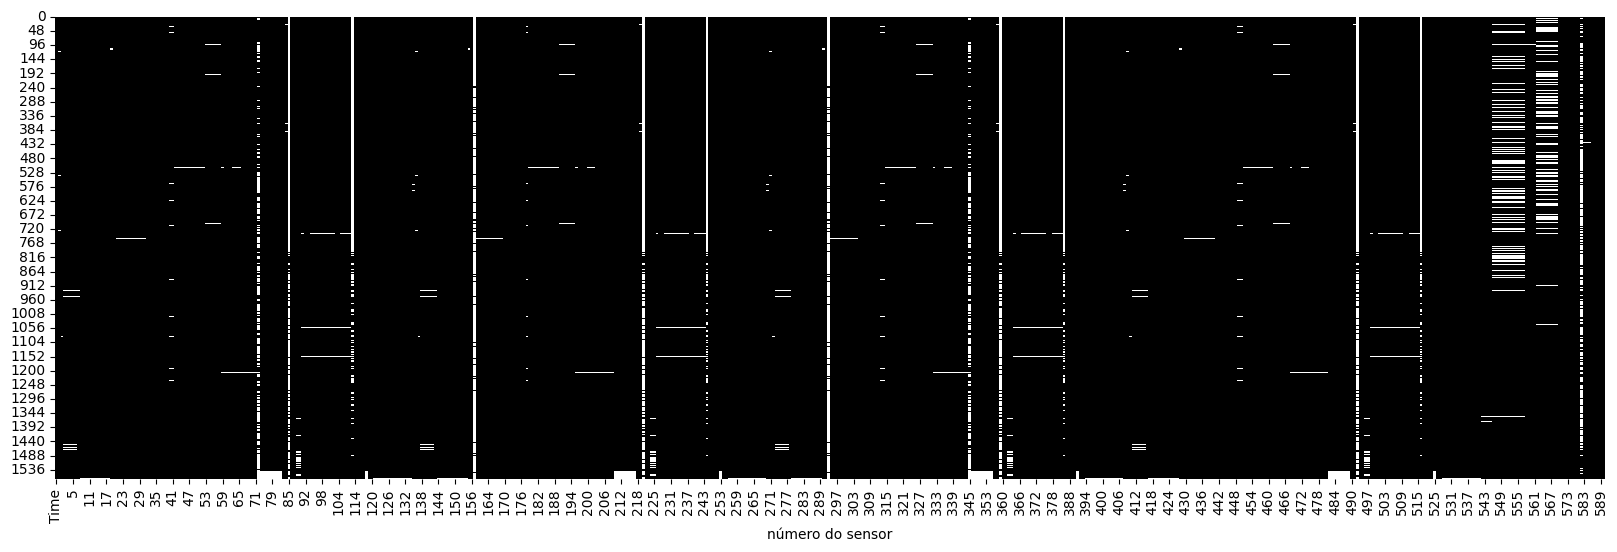

In [10]:
plt.figure(figsize=(20, 6))
sns.heatmap(sensores.isnull(), cmap='gray', cbar=False)
plt.xlabel('número do sensor')
plt.autoscale(tight=True, axis='x')
plt.savefig('figtest.png')

In [11]:
# Mesmo após a exclusão de 32 colunas ainda se tem muitos dados faltantes, iremos preencher
# os valores nulos será preenchido com a média dos valores das medições:

In [16]:
sensores.head()

,Time,0,1,2,3,4,5,6,7,8,...,577,578,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,NaN,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.0096,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.0584,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.0202,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,NaN,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [20]:
sensores['Time'].isnull().sum()

0

In [23]:
saida = sensores['Pass/Fail'] 
media = sensores.mean(numeric_only=True)
media
sensores.fillna(media, inplace=True)
sensores['Pass/Fail'] = saida

In [24]:
# verificar se todos os valores foram preenchidos
nulos = sensores.isnull().sum()
nulos.sum()

0

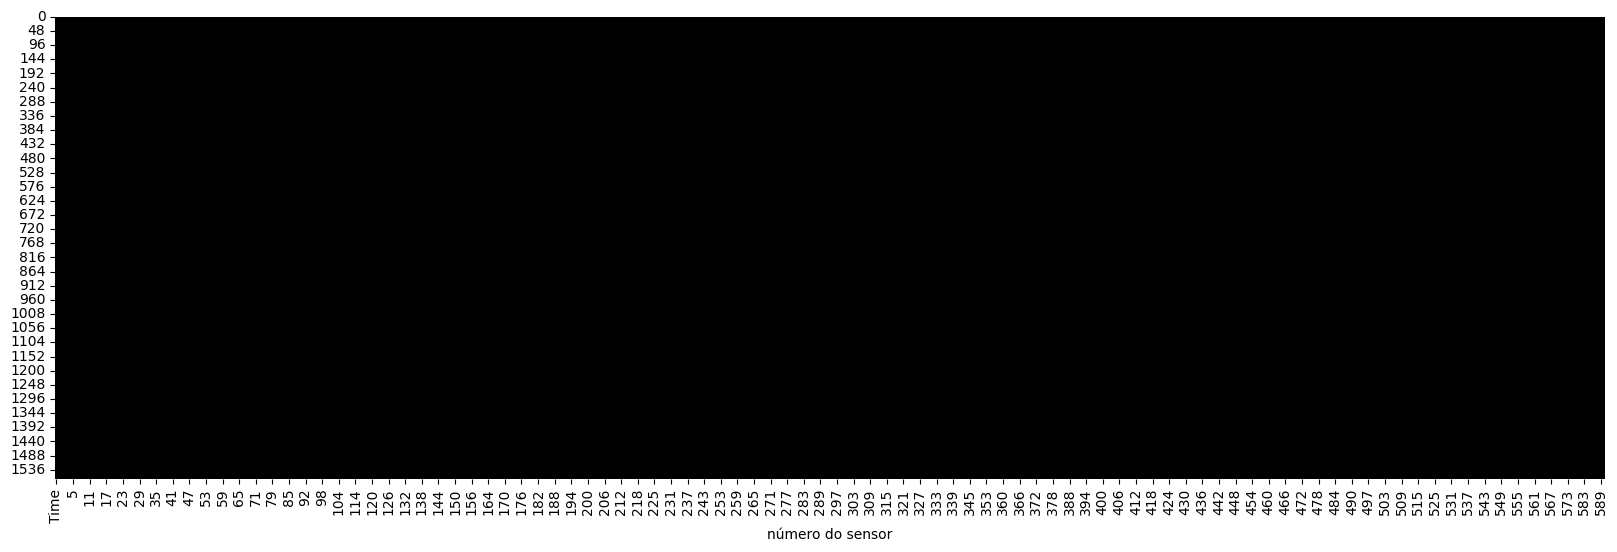

In [25]:
plt.figure(figsize=(20, 6))
sns.heatmap(sensores.isnull(), cmap='gray', cbar=False)
plt.xlabel('número do sensor')
plt.autoscale(tight=True, axis='x')
plt.savefig('figtest.png')

Após tratamento das células vazias será realizado uma análise no conjunto de dados

In [26]:
from sklearn.feature_selection import VarianceThreshold # Biblioteca especifica

In [27]:
x = sensores.iloc[:,1:nova_dimensao_x-1]
y = sensores.iloc[:, nova_dimensao_x-1]

In [28]:
limiar = VarianceThreshold(threshold=.5) # elimina sensores com variancia menor que 0.5.
x_limiar = limiar.fit_transform(x)
sensores = pd.DataFrame(x_limiar)

In [29]:
sensores['Pass/Fail'] = saida

In [30]:
sensores.head() 

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,2.452417,21.117674,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,2.452417,21.117674,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,0.411900,68.848900,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.729000,25.036300,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,2.452417,21.117674,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.843200,-1


In [31]:
nn_dimensao = np.shape(sensores)

In [32]:
nn_dimensao_x = nn_dimensao[1]

In [33]:
r2 = nova_dimensao_x - nn_dimensao_x

In [34]:
r2 # número de sensores eliminados

324

In [21]:
# após está análise eliminou-se mais 324 sensores, totalizando 356 eliminados

In [ ]:
# normalização, deixa os sensores dentro de uma única escala.

'''
SKLEARN METHODS

Scale - Muda apenas a escala, mas não afeta a dimensão
Standardize - Muda a distribuição dos valores para os mesmos terem uma distribuição com desvio padrão=1
Normalize - Pode ser utilizado em qualquer das situaçõe acima

'''

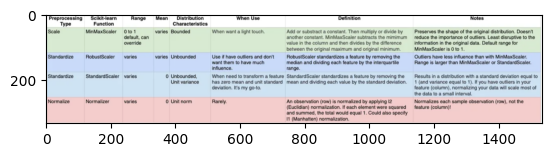

In [38]:
import matplotlib.image as mpimg
img = mpimg.imread('norm.png')
imgplot = plt.imshow(img)

In [46]:
sensores.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,202.4396,7.9558,414.8710,10.0433,...,2.452417,21.117674,533.8500,8.95,3.0624,1.6765,14.9509,2.3630,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,200.5470,10.1548,414.7347,9.2599,...,2.452417,21.117674,535.0164,5.92,2.0111,1.1065,10.9003,4.4447,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,202.0179,9.5157,416.7075,9.3144,...,0.411900,68.848900,535.0245,11.21,4.0923,2.0952,9.2721,3.1745,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,201.8482,9.6052,422.2894,9.6924,...,2.729000,25.036300,530.5682,9.33,2.8971,1.7585,8.5831,2.0544,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,201.9424,10.5661,420.5925,10.3387,...,2.452417,21.117674,532.0155,8.83,3.1776,1.6597,10.9698,99.3032,73.843200,-1


In [48]:
from sklearn.preprocessing import StandardScaler
sensores1=sensores.drop(['Pass/Fail'],axis=1)
scaler = StandardScaler()

data=scaler.fit_transform(sensores1.values)

In [49]:
np.shape(data)

(1567, 235)

In [50]:
df = pd.DataFrame(data)
df['Pass/Fail'] = sensores['Pass/Fail']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,0.224309,0.849725,-0.436273,0.033555,-0.050580,-0.563790,0.762960,-0.375783,0.103782,0.056522,...,-4.905297e-16,0.000000,0.190142,-0.226018,-0.226665,-0.229797,-0.135520,-0.197113,1.514500e-16,-1
1,1.107136,-0.382910,1.017137,0.153067,-0.060045,0.198217,0.181365,0.411536,0.095858,-0.269787,...,-4.905297e-16,0.000000,0.256816,-0.261137,-0.265730,-0.263493,-0.460054,0.385059,1.156689e+00,-1
2,-1.114158,0.799102,-0.481289,0.686213,-0.047906,-0.906210,0.633372,0.182716,0.210561,-0.247086,...,-2.253903e+00,5.144841,0.257279,-0.199823,-0.188395,-0.205046,-0.590505,0.029833,-1.791486e-01,1
3,-0.350312,-0.198875,-0.051547,-1.106948,-0.051290,0.503246,0.581223,0.214760,0.535107,-0.089638,...,3.055067e-01,0.422380,0.002548,-0.221613,-0.232808,-0.224950,-0.645708,-0.283417,-2.752459e-01,-1
4,0.242143,0.087526,1.117387,-0.158919,-0.047492,-0.115382,0.610171,0.558796,0.436445,0.179564,...,-4.905297e-16,0.000000,0.085279,-0.227409,-0.222385,-0.230791,-0.454486,26.913347,-2.752459e-01,-1


In [51]:
sensores =df

# ANÁLISE DE DADOS

Nesta fase é verificado como os dados se correlacionam.

In [52]:
sensores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 236 entries, 0 to Pass/Fail
dtypes: float64(235), int64(1)
memory usage: 2.8 MB


In [53]:
sensores.describe()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
count,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,...,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1.567000e+03,1567.000000
mean,2.448584e-15,-3.814009e-15,-8.706076e-15,-2.720649e-16,1.813766e-17,-5.441297e-17,1.242430e-14,-4.307694e-16,2.829475e-15,-1.587045e-16,...,-1.632389e-16,2.720649e-17,1.117733e-15,6.801622e-17,-2.267207e-17,-9.068829e-18,4.534414e-17,4.534414e-17,1.768422e-16,-0.867262
std,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,...,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,1.000319e+00,0.498010
min,-3.692123e+00,-4.203130e+00,-4.762680e+00,-3.176669e+00,-6.268170e-02,-3.057987e+00,-5.489229e+00,-2.418909e+00,-4.630326e+00,-2.265083e+00,...,-2.299522e+00,-1.925873e+00,-1.219420e+01,-2.887227e-01,-3.018337e-01,-2.896758e-01,-9.662759e-01,-5.230586e-01,-1.062218e+00,-1.000000
25%,-6.505546e-01,-5.357114e-01,-6.621157e-01,-7.108971e-01,-5.668724e-02,-5.115128e-01,-5.610853e-01,-6.833527e-01,-4.043837e-01,-1.412251e-01,...,-6.274171e-01,-6.091596e-01,1.023637e-02,-2.428241e-01,-2.450421e-01,-2.456434e-01,-4.118818e-01,-2.129138e-01,-5.893669e-01,-1.000000
50%,-3.557033e-02,3.815069e-02,1.390060e-02,-2.480201e-01,-5.134893e-02,6.110425e-02,-1.289764e-01,-1.126755e-02,-4.785921e-02,-2.316015e-02,...,-4.917227e-02,-1.008111e-01,1.071545e-01,-2.294949e-01,-2.298832e-01,-2.328715e-01,-2.262959e-01,-8.673046e-02,-2.946444e-01,-1.000000
75%,5.729476e-01,5.348329e-01,5.960931e-01,4.408676e-01,-4.756005e-02,5.504966e-01,6.299454e-01,6.635566e-01,3.486673e-01,9.169756e-02,...,3.924919e-01,2.066858e-01,2.190890e-01,-2.123409e-01,-2.106833e-01,-2.164669e-01,3.513558e-02,6.351778e-02,1.607089e-01,-1.000000
max,4.654374e+00,4.371324e+00,3.905799e+00,5.274818e+00,1.979739e+01,4.533266e+00,2.215268e+01,3.774092e+00,2.394550e+01,3.872052e+01,...,1.137025e+01,6.864433e+00,3.371674e+00,4.938850e+00,5.977286e+00,5.016547e+00,6.435055e+00,2.691335e+01,6.795495e+00,1.000000


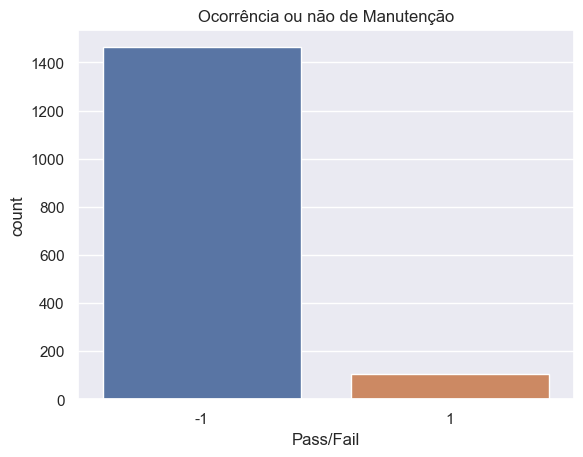

In [54]:
sns.set(style="darkgrid")
sns.countplot(x='Pass/Fail',data=sensores)
plt.title('Ocorrência ou não de Manutenção')
plt.savefig('count_plot.png')

In [55]:
sensores['Pass/Fail'].value_counts()

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [56]:
corr = sensores.corr()
corr.head()

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.010368,-0.007058,0.030675,-0.005749,...,0.060010,0.049862,-0.018953,0.013678,0.015206,0.013228,0.008601,0.023589,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,0.034062,-0.037667,-0.087315,-0.001878,...,-0.017051,-0.025490,-0.009000,0.001753,0.001303,0.002570,-0.010145,0.002273,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,0.018326,0.006476,0.006115,-0.000788,...,0.050434,0.064282,-0.037070,-0.000518,0.001342,0.002592,-0.028705,0.015752,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,-0.028223,-0.019827,-0.013157,-0.004596,...,0.008646,0.046434,0.002231,0.007634,0.006822,0.008216,0.016438,0.026019,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.002707,-0.017523,0.011435,-0.001763,...,-0.012944,0.027696,0.005273,-0.012024,-0.012264,-0.012163,-0.004070,-0.001616,0.050910,-0.013756


<Axes: >

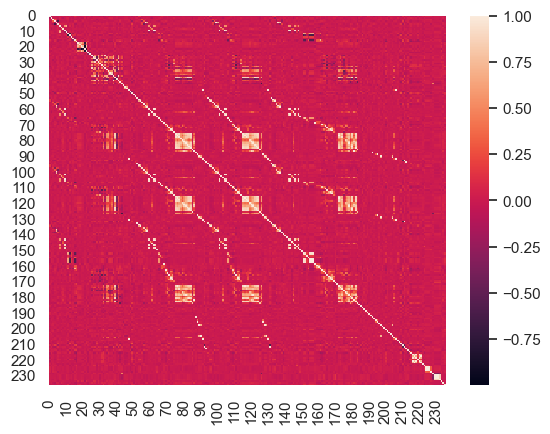

In [57]:
sns.heatmap(corr)

Ao analisar os dados, percebeu-se que os mesmos estão desbalanceados (1463/104), isso provoca inúmeras dificuldades de convergência, desta forma, utilizou-se um método conhecido como SMOTE para gerar dados sitéticos.

In [58]:
x = sensores.iloc[:,:nn_dimensao_x-1]
y = sensores.iloc[:, nn_dimensao_x-1]

In [59]:
from sklearn.model_selection import train_test_split # Biblioteca para dividir o conjunto de dados em

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
X_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [62]:
y_resampled.value_counts() # valor de amostrar agora é balanceado

Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=27)


In [64]:
#from sklearn.preprocessing import StandardScaler # Biblioteca para Normalizar os dados

In [34]:
#scaler = StandardScaler()

In [35]:
#scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [65]:
#x_train = scaler.transform(X_train)
#x_test = scaler.transform(X_test)

In [67]:
np.shape(X_train) # dimensão traino

(2048, 235)

In [68]:
np.shape(X_test) # dimensão teste

(878, 235)

# Rede Neural

Nessa fase a Perceptron Multicamadas será implementada

In [69]:
from sklearn.neural_network import MLPClassifier

In [72]:
clf = MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=(300, 300), random_state=1, verbose=True, max_iter=5000, learning_rate_init=1e-3, activation='logistic')

# sgd - método que utiliza o gradiente descente
# activation =  logistic - para utilizar a função sigmoide

In [73]:
clf.fit(X_train, y_train)

Iteration 1, loss = 0.76690307
Iteration 2, loss = 0.69598260
Iteration 3, loss = 0.69840205
Iteration 4, loss = 0.69376382
Iteration 5, loss = 0.69352679
Iteration 6, loss = 0.69380912
Iteration 7, loss = 0.69346171
Iteration 8, loss = 0.69331237
Iteration 9, loss = 0.69337877
Iteration 10, loss = 0.69320338
Iteration 11, loss = 0.69317784
Iteration 12, loss = 0.69306410
Iteration 13, loss = 0.69301188
Iteration 14, loss = 0.69332281
Iteration 15, loss = 0.69281900
Iteration 16, loss = 0.69306006
Iteration 17, loss = 0.69264236
Iteration 18, loss = 0.69269444
Iteration 19, loss = 0.69251162
Iteration 20, loss = 0.69248213
Iteration 21, loss = 0.69263671
Iteration 22, loss = 0.69218171
Iteration 23, loss = 0.69223300
Iteration 24, loss = 0.69217198
Iteration 25, loss = 0.69201965
Iteration 26, loss = 0.69195672
Iteration 27, loss = 0.69185175
Iteration 28, loss = 0.69184540
Iteration 29, loss = 0.69177583
Iteration 30, loss = 0.69184967
Iteration 31, loss = 0.69167221
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(300, 300),
              max_iter=5000, random_state=1, solver='sgd', verbose=True)

In [74]:
Y_axis = clf.loss_curve_

# VALIDAÇÃO

Nessa fase sera realizado o processo de validação, para ver se o algoritmo funcionou como esperado

In [75]:
Y_axis_shape = np.shape(Y_axis)

In [76]:
X_axis = np.linspace(0, clf.n_iter_, Y_axis_shape[0])

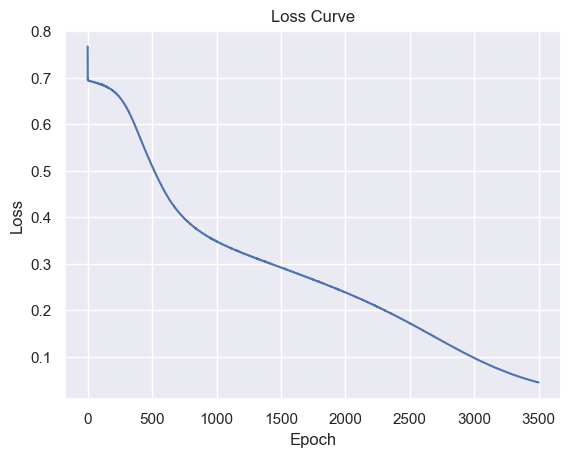

In [77]:
plt.plot(X_axis, Y_axis)
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('loss_curve')

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
predictions = clf.predict(X_test)

In [80]:
m_conf = confusion_matrix(y_test, predictions)

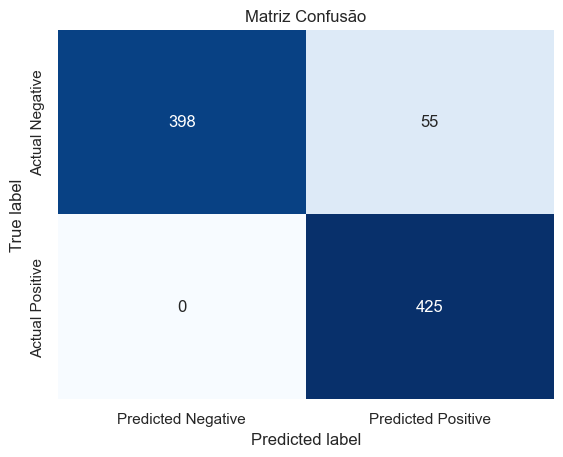

In [81]:
sns.heatmap(pd.DataFrame(m_conf, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive']),annot=True, cmap='Blues', fmt='d', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz Confusão')
plt.savefig('M_conf')

In [82]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       1.00      0.88      0.94       453
           1       0.89      1.00      0.94       425

    accuracy                           0.94       878
   macro avg       0.94      0.94      0.94       878
weighted avg       0.94      0.94      0.94       878

